In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_csv("./Data/Churn_kaggle.csv")

In [3]:
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

Here every column is categorical variables so i have to create dummy variable so this can be numeric.

In [5]:
churn.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [6]:
churn = churn.drop(columns = ['State','Area code'], axis = 1)

In [7]:
churn.Churn.value_counts(normalize = True)

False    0.857571
True     0.142429
Name: Churn, dtype: float64

In [8]:
churn_dummies = churn.copy()

In [9]:
churn_ = pd.get_dummies(churn_dummies, 
                     columns = ['International plan', 'Voice mail plan']) 

In [10]:
churn_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          667 non-null    int64  
 1   Number vmail messages   667 non-null    int64  
 2   Total day minutes       667 non-null    float64
 3   Total day calls         667 non-null    int64  
 4   Total day charge        667 non-null    float64
 5   Total eve minutes       667 non-null    float64
 6   Total eve calls         667 non-null    int64  
 7   Total eve charge        667 non-null    float64
 8   Total night minutes     667 non-null    float64
 9   Total night calls       667 non-null    int64  
 10  Total night charge      667 non-null    float64
 11  Total intl minutes      667 non-null    float64
 12  Total intl calls        667 non-null    int64  
 13  Total intl charge       667 non-null    float64
 14  Customer service calls  667 non-null    in

this is imbalancing data 


# Obsevation of data

1. Imbalance data: 
    
   14 and 85 is not sufficient 

    
   70 and 30 is okay for balanced the data

### EDA to selecteed variables:

<Axes: xlabel='Churn', ylabel='Account length'>

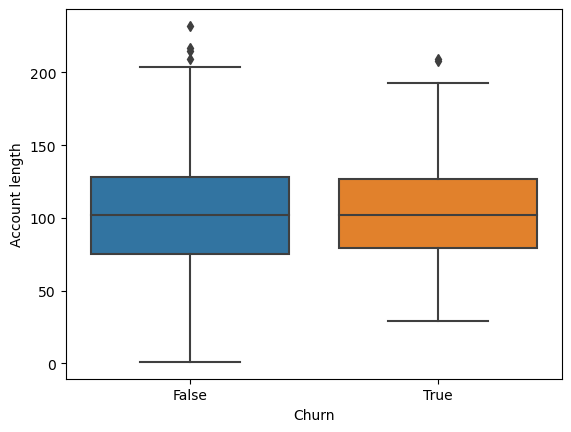

In [11]:
sns.boxplot(x = 'Churn', y ='Account length', data = churn_ )

<Axes: xlabel='Churn', ylabel='Total day minutes'>

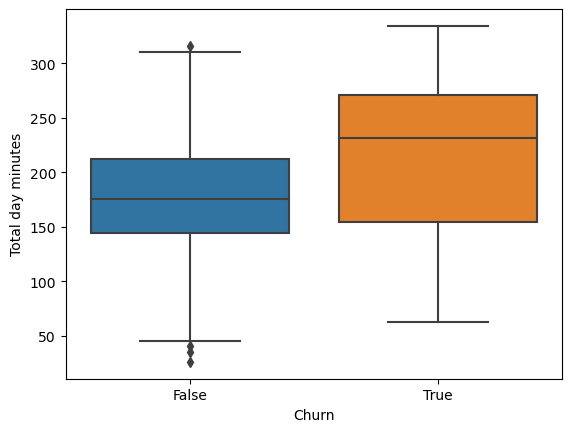

In [12]:
sns.boxplot(x = 'Churn', y ='Total day minutes', data = churn_ )

In [13]:
churn_.corr()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
Account length,1.000000,-0.011993,0.017833,0.035703,0.017839,0.027043,0.021237,0.027051,-0.007527,0.027228,-0.007528,0.002362,0.031279,0.002456,-0.027677,0.012315,-0.029549,0.029549,-0.003918,0.003918
Number vmail messages,-0.011993,1.000000,-0.069172,-0.009952,-0.069187,0.040865,-0.051951,0.040876,0.039751,0.003367,0.039680,0.029949,-0.036847,0.029999,0.007859,-0.102381,-0.023145,0.023145,-0.956168,0.956168
Total day minutes,0.017833,-0.069172,1.000000,-0.032306,1.000000,0.017987,0.043219,0.017945,-0.031600,0.052761,-0.031603,-0.006725,0.016597,-0.006841,0.029291,0.242781,-0.050915,0.050915,0.060599,-0.060599
Total day calls,0.035703,-0.009952,-0.032306,1.000000,-0.032319,-0.004688,0.005851,-0.004664,0.079536,-0.030074,0.079529,-0.015319,-0.005155,-0.015201,-0.045953,0.019360,-0.040889,0.040889,0.025318,-0.025318
Total day charge,0.017839,-0.069187,1.000000,-0.032319,1.000000,0.017983,0.043231,0.017941,-0.031613,0.052748,-0.031616,-0.006720,0.016582,-0.006836,0.029290,0.242777,-0.050903,0.050903,0.060612,-0.060612
Total eve minutes,0.027043,0.040865,0.017987,-0.004688,0.017983,1.000000,-0.029077,1.000000,-0.007705,0.001938,-0.007603,-0.027855,0.002929,-0.027887,-0.012213,0.175614,0.011273,-0.011273,-0.030493,0.030493
Total eve calls,0.021237,-0.051951,0.043219,0.005851,0.043231,-0.029077,1.000000,-0.029089,-0.009856,0.036068,-0.009833,-0.001050,0.074829,-0.001152,0.008126,0.055669,0.012082,-0.012082,0.048341,-0.048341
Total eve charge,0.027051,0.040876,0.017945,-0.004664,0.017941,1.000000,-0.029089,1.000000,-0.007691,0.001939,-0.007589,-0.027863,0.002894,-0.027895,-0.012212,0.175616,0.011274,-0.011274,-0.030501,0.030501
Total night minutes,-0.007527,0.039751,-0.031600,0.079536,-0.031613,-0.007705,-0.009856,-0.007691,1.000000,0.005209,0.999999,-0.041969,-0.057212,-0.042221,-0.067602,0.042930,0.115659,-0.115659,-0.026803,0.026803
Total night calls,0.027228,0.003367,0.052761,-0.030074,0.052748,0.001938,0.036068,0.001939,0.005209,1.000000,0.005195,0.024038,-0.072354,0.023863,-0.039794,-0.017626,0.011561,-0.011561,-0.021533,0.021533


In [14]:
target =churn_["Churn"]
X = churn_.drop(['Churn'], axis = 1)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          667 non-null    int64  
 1   Number vmail messages   667 non-null    int64  
 2   Total day minutes       667 non-null    float64
 3   Total day calls         667 non-null    int64  
 4   Total day charge        667 non-null    float64
 5   Total eve minutes       667 non-null    float64
 6   Total eve calls         667 non-null    int64  
 7   Total eve charge        667 non-null    float64
 8   Total night minutes     667 non-null    float64
 9   Total night calls       667 non-null    int64  
 10  Total night charge      667 non-null    float64
 11  Total intl minutes      667 non-null    float64
 12  Total intl calls        667 non-null    int64  
 13  Total intl charge       667 non-null    float64
 14  Customer service calls  667 non-null    in

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, target,test_size = 0.2, random_state = 1)

In [17]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(x_train, y_train)

C:\Users\Ishita Bhojani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
logit.intercept_

array([-0.03733027])

In [19]:
logit.coef_

array([[-3.63410515e-03, -2.87785408e-02,  9.88492603e-03,
        -1.29022542e-02,  1.63148079e-03,  4.73107299e-03,
        -1.02250711e-02,  5.14727601e-04,  1.06168603e-05,
        -1.89841425e-02,  1.69583230e-04, -6.60105632e-02,
         2.93776898e-02, -1.77865017e-02,  4.60714993e-01,
        -1.24247407e-01,  8.69910293e-02, -2.21355073e-02,
        -1.51208702e-02]])

In [20]:
import statsmodels.api as sm 
x_train_sm = sm.add_constant(x_train)

sm_model = sm.Logit(y_train,x_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.309586
         Iterations 14


In [21]:
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                  533
Model:                          Logit   Df Residuals:                      515
Method:                           MLE   Df Model:                           17
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:                  0.2564
Time:                        00:31:35   Log-Likelihood:                -165.01
converged:                       True   LL-Null:                       -221.89
Covariance Type:            nonrobust   LLR p-value:                 2.350e-16
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -6.1829   2.96e+06  -2.09e-06      1.000    -5.8e+06     5.8e+06
Account length             0.0009      0.004      0.267      0.789      -0.006       0.008
Numb

In [22]:
coef_sm = pd.read_html(sm_model.summary().tables[1].as_html(),header = 0, index_col =0)[0]

In [23]:
coef_sm['odds_ratio'] = np.exp(coef_sm['coef'])

In [24]:
coef_sm

,coef,std err,z,P>|z|,[0.025,0.975],odds_ratio
const,-6.1829,2960000.000,-0.000002,1.000,-5800000.000,5800000.000,2.064432e-03
Account length,0.0009,0.004,0.267000,0.789,-0.006,0.008,1.000900e+00
Number vmail messages,0.0261,0.042,0.622000,0.534,-0.056,0.108,1.026444e+00
Total day minutes,-3.9384,8.253,-0.477000,0.633,-20.113,12.236,1.947936e-02
Total day calls,0.0044,0.007,0.616000,0.538,-0.010,0.019,1.004410e+00
Total day charge,23.2562,48.546,0.479000,0.632,-71.892,118.404,1.259039e+10
Total eve minutes,-3.6865,4.140,-0.891000,0.373,-11.800,4.427,2.505956e-02
Total eve calls,0.0098,0.008,1.302000,0.193,-0.005,0.025,1.009848e+00
Total eve charge,43.5355,48.704,0.894000,0.371,-51.922,138.993,8.076578e+18
Total night minutes,0.0650,2.280,0.029000,0.977,-4.403,4.533,1.067159e+00


In [25]:
x_test_sm = sm.add_constant(x_test,  has_constant='add')
print(x_test_sm.shape)

(134, 20)


In [26]:
pred_sm = sm_model.predict(x_test_sm) 

In [27]:
pred = np.where(pred_sm > 0.5,1,0)

In [28]:
y_pred = logit.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
print('Stat model')
print(confusion_matrix(y_test, pred))
print(confusion_matrix(y_test, y_pred))

Stat model
[[112   5]
 [ 10   7]]
[[113   4]
 [ 14   3]]


In [30]:
precision_score(y_test, y_pred)

0.42857142857142855

In [31]:
recall_score(y_test, y_pred)

0.17647058823529413

1. Why 0.5 cutt off?
    




2. How done Compar models??
    

In [32]:
pred = np.where(pred_sm >0.3,1,0)

print('Stat model')
print(confusion_matrix(y_test, pred))

Stat model
[[102  15]
 [  8   9]]


In [33]:
precision_score(y_test, pred)

0.375

In [34]:
recall_score(y_test, pred)

0.5294117647058824

In [35]:
y_pred = logit.predict_proba(x_test)

In [36]:
y_pred

array([[0.96829128, 0.03170872],
       [0.81346395, 0.18653605],
       [0.96304995, 0.03695005],
       [0.80077896, 0.19922104],
       [0.90575398, 0.09424602],
       [0.93979965, 0.06020035],
       [0.87564958, 0.12435042],
       [0.86312614, 0.13687386],
       [0.95889135, 0.04110865],
       [0.46361568, 0.53638432],
       [0.67764965, 0.32235035],
       [0.8723489 , 0.1276511 ],
       [0.97853595, 0.02146405],
       [0.9143175 , 0.0856825 ],
       [0.88103506, 0.11896494],
       [0.87109394, 0.12890606],
       [0.80302505, 0.19697495],
       [0.96866524, 0.03133476],
       [0.89793987, 0.10206013],
       [0.92594524, 0.07405476],
       [0.9133322 , 0.0866678 ],
       [0.89454057, 0.10545943],
       [0.87017916, 0.12982084],
       [0.91119588, 0.08880412],
       [0.9065804 , 0.0934196 ],
       [0.70342029, 0.29657971],
       [0.61610007, 0.38389993],
       [0.80219339, 0.19780661],
       [0.67368267, 0.32631733],
       [0.58741651, 0.41258349],
       [0.

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1], pos_label = 1)
roc_auc = auc(fpr, tpr)

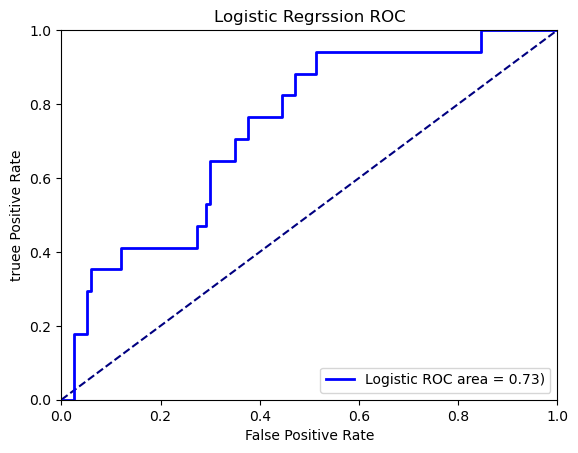

In [38]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('truee Positive Rate')
plt.plot([0,1], [0,1], color = 'navy', linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Logistic Regrssion ROC")
plt.plot(fpr, tpr, color = 'blue',lw = 2, label = "Logistic ROC area = %0.2f)" % roc_auc)
plt.legend(loc = 'lower right')
plt.show()

In [39]:
y_pred = sm_model.predict(x_test_sm)

In [40]:
y_pred

224    0.003109
362    0.647059
47     0.056700
507    0.225276
443    0.111072
         ...   
197    0.178893
307    0.072063
559    0.068765
608    0.105484
635    0.290796
Length: 134, dtype: float64

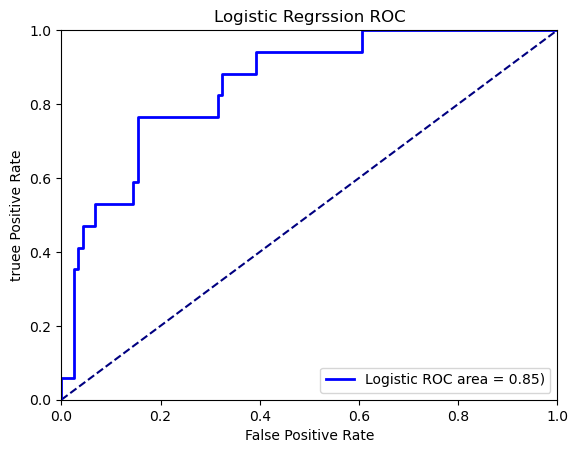

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('truee Positive Rate')
plt.plot([0,1], [0,1], color = 'navy', linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Logistic Regrssion ROC")
plt.plot(fpr, tpr, color = 'blue',lw = 2, label = "Logistic ROC area = %0.2f)" % roc_auc)
plt.legend(loc = 'lower right')
plt.show()


In [42]:
cols = ["Total day minutes",'Total eve minutes','Customer service calls','International plan_Yes','Voice mail plan_Yes']
x_tr = x_train[cols]
x_te = x_test[cols]

x_tr.columns

Index(['Total day minutes', 'Total eve minutes', 'Customer service calls',
       'International plan_Yes', 'Voice mail plan_Yes'],
      dtype='object')

In [43]:
logmodel =LogisticRegression()
logmodel.fit(x_tr, y_train)

LogisticRegression()

In [44]:
logmodel.coef_

array([[ 0.01390974,  0.01190569,  0.54330195,  1.28417843, -0.84187729]])

In [45]:
coef = np.array(logmodel.coef_)
coef = coef.reshape([len(cols),])
var_coef = pd.DataFrame({'Vars': cols, 'coef' : coef})
var_coef['ods_ratio'] = np.exp(var_coef["coef"])

In [46]:
var_coef

,Vars,coef,ods_ratio
0,Total day minutes,0.013910,1.014007
1,Total eve minutes,0.011906,1.011977
2,Customer service calls,0.543302,1.721682
3,International plan_Yes,1.284178,3.611699
4,Voice mail plan_Yes,-0.841877,0.430901


In [47]:
pred = logmodel.predict(x_te)

In [48]:
confusion_matrix(y_test, pred)

array([[114,   3],
       [ 12,   5]], dtype=int64)

In [49]:
prob = logmodel.predict_proba(x_te)

In [50]:
pred = np.where(prob[:, 1] > 0.3, 1,0)

In [51]:
confusion_matrix(y_test, pred)

array([[102,  15],
       [  6,  11]], dtype=int64)

In [52]:
precision_score(y_test, pred)

0.4230769230769231

In [53]:
recall_score(y_test, pred)

0.6470588235294118

In [54]:
y_pred = logmodel.predict_proba(x_te)

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_pred[:, 1], pos_label = 1)
lr_roc_auc = auc(fpr, tpr)

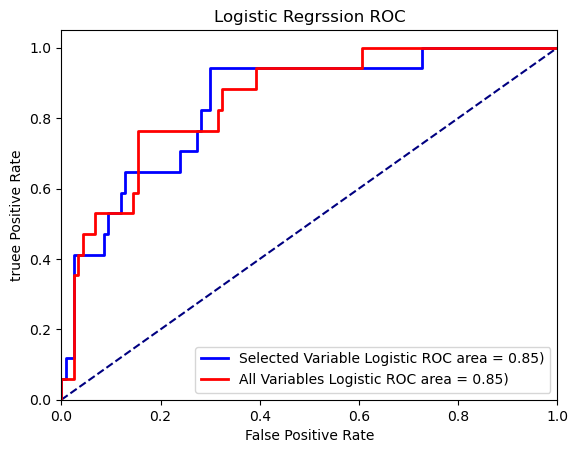

In [55]:

plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('truee Positive Rate')
plt.plot([0,1], [0,1], color = 'navy', linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Logistic Regrssion ROC")
plt.plot(lr_fpr, lr_tpr, color = 'blue',lw = 2, label = "Selected Variable Logistic ROC area = %0.2f)" % lr_roc_auc)
plt.plot(fpr, tpr, color = 'red',lw = 2, label = "All Variables Logistic ROC area = %0.2f)" % roc_auc)
plt.legend(loc = 'lower right')
plt.show()


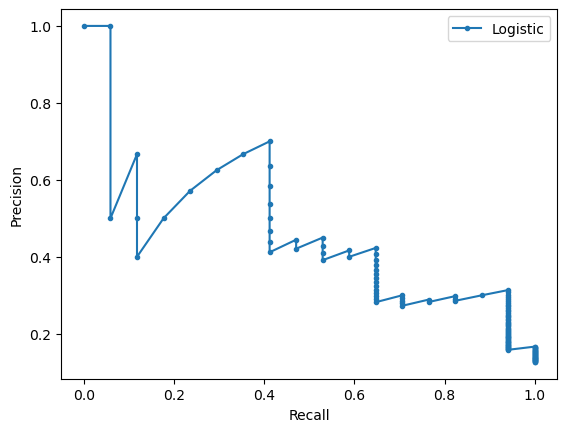

In [56]:
import numpy as np
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, y_pred[:,1])
plt.plot(recall, precision, marker ='.', label = "Logistic")

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.legend()

plt.show()